In [1]:
# --------------------------------------------
# Fashion MNIST CNN (Dataset from CSV files)
# --------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import pandas as pd


In [2]:
# ✅ Load dataset from CSV files
train_data = pd.read_csv(r"C:\Users\marta\Downloads\Fashion MNIST-20221031T093245Z-001\Fashion MNIST\fashion-mnist\fashion-mnist_train.csv")
test_data = pd.read_csv(r"C:\Users\marta\Downloads\Fashion MNIST-20221031T093245Z-001\Fashion MNIST\fashion-mnist\fashion-mnist_test.csv")

In [3]:
# Split into features and labels
x_train = train_data.iloc[:, 1:].values / 255.0   # Normalize pixels (0–255 → 0–1)
y_train = train_data.iloc[:, 0].values            # First column = label

x_test = test_data.iloc[:, 1:].values / 255.0
y_test = test_data.iloc[:, 0].values

# Reshape for CNN input (28×28 grayscale images)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)


In [4]:
# Optional: create validation set
xtrain, X_val, ytrain, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [5]:
# Class names (for display)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
# ✅ Build CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


C:\Users\marta\Anaconda3\anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# ✅ Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# ✅ Train model
history = model.fit(xtrain, ytrain, epochs=10, validation_data=(X_val, y_val))

# ✅ Evaluate model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest Accuracy: {test_acc:.4f}")

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8244 - loss: 0.4874 - val_accuracy: 0.8678 - val_loss: 0.3653
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8821 - loss: 0.3267 - val_accuracy: 0.8873 - val_loss: 0.3137
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8986 - loss: 0.2782 - val_accuracy: 0.8906 - val_loss: 0.3015
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9102 - loss: 0.2461 - val_accuracy: 0.8966 - val_loss: 0.2877
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9184 - loss: 0.2216 - val_accuracy: 0.9076 - val_loss: 0.2513
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9254 - loss: 0.2002 - val_accuracy: 0.9094 - val_loss: 0.2526
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9339 - loss: 0.1802 - val_accuracy: 0.9112 - val_loss: 0.2481
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9389 - loss: 0

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


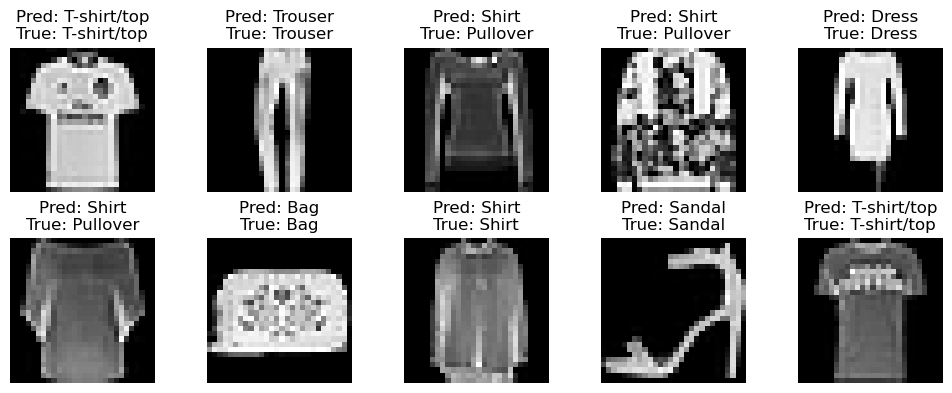

In [8]:
# ✅ Display few predictions
predictions = model.predict(x_test[:10])
pred_labels = np.argmax(predictions, axis=1)

plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {class_names[pred_labels[i]]}\nTrue: {class_names[y_test[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()